In [107]:
import yfinance as yf

In [108]:
df = yf.Ticker("^GSPC")

In [109]:
# max vererek baştan sonra tüm verileri almak için ""
df = df.history(period="max")

In [110]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,0.0,0.0
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,0.0,0.0
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000,0.0,0.0


<Axes: xlabel='Date'>

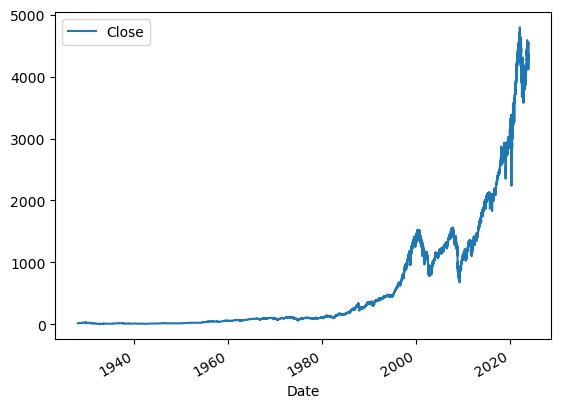

In [111]:
df.plot.line(y="Close", use_index=True)  # x is date and y is close price 

In [112]:
# dividends = temettü 
# stock split = hisse bölünmeleri 
# bunlar genel için değil de bireysel hisseler için daha uygun bu sebeple bizim işimize yaramıyor.

del df["Dividends"]
del df["Stock Splits"]

In [113]:
df

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000


In [114]:
# for making clustering we need a binary target. But we dont have so that ; 
#I will create a target about tomorrow the price increased is represented by 1, decreased is 0.

In [115]:
df["Tomorrow"] = df["Close"].shift(-1)

In [116]:
df
# 3 ocak tarihinin kapanışını aldık yarın olarak 4 ocak tarihinin kapanışını tomorrow sutununda tuttuk. 
# Artık tahminleyeceğim şey yarının fiyatının bugünün fiyatından büyük olmasıdır. 

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000,4547.379883


In [117]:
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

In [118]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000,4547.379883,1


In [119]:
# borsada geçmiş veriler çok yanıltıcı olabilir, değişkendir çünkü. 

df = df.loc["1990-01-01":].copy()

In [120]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000,4547.379883,1


In [121]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1 )

# zaman series dataset
train = df.iloc[:-100]   # son 100 satır dışındakileri al bu demektir ki geçmişi kullanarak geleceği tahmin et. Çünkü zaman sıralı şekilde verilmiş. 
test = df.iloc[-100:] 


In [122]:
predictors = ["Close","Volume","Open","High","Low"]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [123]:
# doğruluğunu ölçelim. 

from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [124]:
import pandas as pd 

preds = pd.Series(preds, index=test.index)

In [125]:
preds

Date
2023-07-03 00:00:00-04:00    0
2023-07-05 00:00:00-04:00    1
2023-07-06 00:00:00-04:00    1
2023-07-07 00:00:00-04:00    1
2023-07-10 00:00:00-04:00    0
                            ..
2023-11-15 00:00:00-05:00    1
2023-11-16 00:00:00-05:00    1
2023-11-17 00:00:00-05:00    1
2023-11-20 00:00:00-05:00    1
2023-11-21 00:00:00-05:00    1
Length: 100, dtype: int64

In [126]:
precision_score(test["Target"], preds)

0.5194805194805194

<Axes: xlabel='Date'>

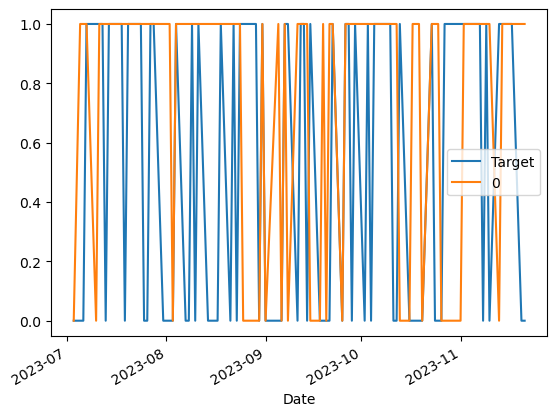

In [127]:
# tahmin değerleri ile grçek değerleri karışılaştıralım turuncu = pred, blue = real
# son zamanlarda değişim büyük olduğu için hata fazla görünüyor.
combined = pd.concat([test["Target"], preds], axis=1)

combined.plot()

In [128]:
# backtest 
#Backtest, bir stratejinin geçmiş verilere dayanarak nasıl performans gösterdiğini anlamak için güçlü bir araçtır. 
# Ancak, dikkatlice kullanılmalıdır çünkü geçmiş başarı, gelecekteki başarıyı garantilemez ve stratejinin aşırı uyarlamaya (overfitting) veya geçmişteki koşullara özel olmasına neden olabilir.

def predict(train, test, predictors, model): 
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [129]:
# her ticaret yılında yaklaşım 250 gün vardır. Yani 10 yıllık veriyle modeli eğit diyoruz. 
#ilk 10 yıllık veriyle 11. yılın verilerini tahminnedeceiz.Sonra 11 yılı da alıp 12. yılı tahminleyecek. 

def backtest(data, model, predictors, start=2500, step=250):
    
    all_predictions = []  # yılların tahminleri sonra bu yıllar içinde gezeceğiz 
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [130]:
predictions = backtest(df, model, predictors)

In [131]:
predictions["Predictions"].value_counts()

1    89771
0    53768
Name: Predictions, dtype: int64

In [132]:
precision_score(predictions["Target"], predictions["Predictions"])

0.7099508750041773

In [133]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.531932
0    0.468068
Name: Target, dtype: float64

In [134]:
#.53 ü yükselirken 0.46sı yükselmiyor. 

In [135]:
# son 2 ortalama kapanış fiyatını hesaplayacağız. Son işlem haftasının 5 günü, son 2 ay (60) , son bir yıl, son 4 yılın 60 işlemi

# yükseliş zamanı

horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    # kapanış fiyatı hareketli ortalama ile elde edilecek işte bugün ile son 5 yüzde kaç değişmiş. 
    ratio_column = f"Close_Ration_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [136]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_5,Trend_5,Close_Ration_60,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1,1.000798,2.0,1.015410,3.0,1.033189,33.0,1.072253,127.0,1.146451,528.0
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1,1.000595,2.0,1.009295,4.0,1.034133,33.0,1.072955,128.0,1.147416,528.0
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000,4547.379883,1,1.000641,2.0,1.006139,4.0,1.034914,34.0,1.073770,128.0,1.148490,528.0


In [137]:
df = df.dropna()

In [138]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_5,Trend_5,Close_Ration_60,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883,1,1.009447,1.0,1.019312,3.0,1.031997,32.0,1.071098,126.0,1.145022,528.0
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1,1.000798,2.0,1.015410,3.0,1.033189,33.0,1.072253,127.0,1.146451,528.0
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1,1.000595,2.0,1.009295,4.0,1.034133,33.0,1.072955,128.0,1.147416,528.0


In [139]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [140]:
!pip install --upgrade scikit-learn

In [141]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [142]:
predictions = backtest(df, model, new_predictors)

In [143]:
predictions["Predictions"].value_counts()

0.0    78359
1.0    31679
Name: Predictions, dtype: int64

In [144]:
# 78359 gün boyunca fiyat düşecek, 31679 gün boyunca artacak.

In [145]:
precision_score(predictions["Target"], predictions["Predictions"])

0.9695381798667887